In [1]:
import numpy as np
import networkx as nx

import utils



n = 10
T = 1000 * n

amounts_spent = np.random.multinomial(T, pvals = np.ones(n) / n)
print(amounts_spent)
print(n)

[ 986 1020 1027  938 1024  997 1015  965 1018 1010]
10


1) Choose N = 10 and set the total expenditure over the course of the trip to T = 1000 · N

3) Generate a complete graph among the friends with edge capacity set to ∞ for all edges.

DiGraph with 10 nodes and 90 edges


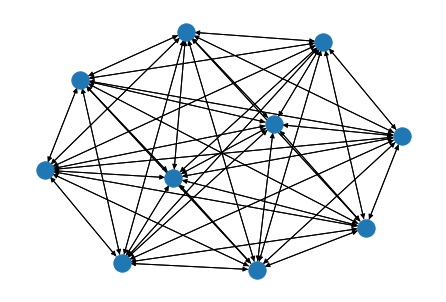

In [2]:
G = nx.complete_graph(10, nx.DiGraph())
nx.set_edge_attributes(G, np.inf, "cap")

print(G)
nx.draw(G)

2) Generate a vector of individual expenditures according to a multinomial distribution with
N using the following script:
amounts spent = numpy.random.multinomial(T, pvals = np.ones(N) / N)
Verify that the sum of all the elements in the amounts spent array is T .

In [3]:

Pay = [i for i in range(len(amounts_spent)) if amounts_spent[i] < T/n]
Pay

[0, 3, 5, 7]

In [4]:
Recieve = [i for i in range(len(amounts_spent)) if amounts_spent[i] >= T/n]
Recieve

[1, 2, 4, 6, 8, 9]

d) Identify the nodes that (1) need to pay (i.e., T /N − amounts spent[i] > 0) and (2) those
that need to receive money (i.e., T /N − amounts spent[i] ≤ 0) to balance the books.

In [5]:
G.add_node('s')
G.add_node('t')

for p in Pay:
    G.add_edge('s', p, cap = T/n - amounts_spent[p])
    
for r in Recieve:
    G.add_edge(r, 't', cap = amounts_spent[r] - T/n)

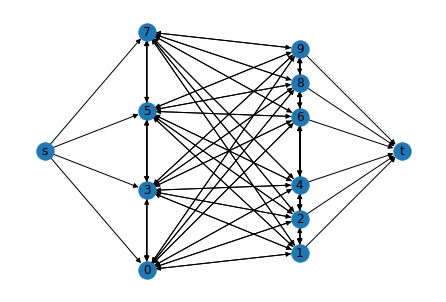

In [6]:
pos = utils.flow_layout(G)
nx.draw(G, pos=pos, with_labels = True)


) Build the following flow network:
1. Introduce a source node s and connect it to the nodes in the former set with edge
capacity equal to their individual balance (equal to T /N − amounts spent[i]).
2. Introduce a target node t and connect each node in the latter group to t with edge
capacity equal to their individual balance (equal to amounts spent[i] − T /N ).
Plot the flow network. You can use the flow layout the method in the attached script
file to get a flow layout for this graph

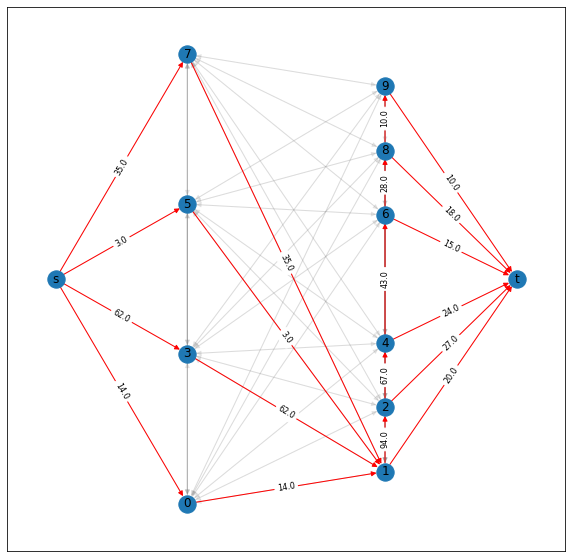

In [8]:
flowVal, flowDict = nx.maximum_flow(G, "s", "t", capacity="cap")
utils.draw_flow(G, flowDict=flowDict, fig_kwargs={"figsize":(10, 10)}, nx_kwargs={"font_size": 8})

 you run the Max-Flow algorithm, it can be shown that each flow represents the set of
transactions that need to take place to balance the books. Use the max-flow algorithm
to find the transactions required to settle up the balances, and verify whether the books
were balanced using the flow.
Useful methods: networkx.maximum flow.
Useful methods: Use draw flow from the attached script file to draw the flow network
with the flows highlighted.


After checking the values manually on paper, the graph does verify that the max flow problem solves the problem correctly